# Sentimental Analysis of Youtube Comments

## Reading in the data

In [17]:
import pandas as pd
import numpy as np 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import preprocessing

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\djasb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
data = pd.read_csv('C:\\Users\\djasb\\Documents\\school\\2021W1\\LING242\\youtube_sentimental_analysis\\data\\dog.csv', error_bad_lines=False)

C:\Users\djasb\AppData\Local\Programs\Python\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
comments = data['comment']

In [11]:
print(comments)

0     Before commenting "Except a dog can't live tha...
1     God dude, almost had my tear up. Idk what I'll...
2      I actually going to the cinema to watch this one
3         the movie makes me sad because i kicked a dog
4                              I'm not crying, you are.
5                                          Awww so cute
6                                      this made me cry
7     The highest living dog is 29 and this movie is...
8                                              Poor dog
9                           Can you do a dogs way home?
10                                  better then marvels
11               Okay move recap officially made me cry
12    I can just imagine how hard did it take to mak...
13    Dam this is the cutest and saddest movie I hav...
14                   3:51 Oh no! our table! its broken!
15    Before commenting "Except a dog can't live tha...
16    God dude, almost had my tear up. Idk what I'll...
17     I actually going to the cinema to watch t

In [14]:
n = comments.shape[0]
for i in range(0,n):
    print(comments.iloc[i])

Before commenting "Except a dog can't live that long," watch the video...
God dude, almost had my tear up. Idk what I'll
Do when my dog goes
I actually going to the cinema to watch this one
the movie makes me sad because i kicked a dog
I'm not crying, you are.
Awww so cute
this made me cry
The highest living dog is 29 and this movie is after 37 he met
Poor dog
Can you do a dogs way home?
better then marvels
Okay move recap officially made me cry
I can just imagine how hard did it take to make this video
Dam this is the cutest and saddest movie I have ever seen I played with my dog for an hour after watching this
3:51 Oh no! our table! its broken!
Before commenting "Except a dog can't live that long," watch the video...
God dude, almost had my tear up. Idk what I'll
Do when my dog goes
I actually going to the cinema to watch this one
the movie makes me sad because i kicked a dog
I'm not crying, you are.
Awww so cute
this made me cry
The highest living dog is 29 and this movie is after 3

## Preprocessing

In [21]:
n = comments.shape[0]
for i in range(0,n):
    sent = preprocessing.preprocessing(comments.iloc[i])
    sent.preprocess()
    s = sent.get_sent()
    comments.iloc[i] = s

['commenting', 'except', 'dog', 'ca', 'live', 'long', 'watch', 'video']
['god', 'dude', 'almost', 'tear', 'idk', 'dog', 'goes']
['actually', 'going', 'cinema', 'watch', 'one']
['movie', 'makes', 'sad', 'kicked', 'dog']
['crying']
['awww', 'cute']
['made', 'cry']
['highest', 'living', 'dog', 'movie', 'met']
['poor', 'dog']
['dogs', 'way', 'home']
['better', 'marvels']
['okay', 'move', 'recap', 'officially', 'made', 'cry']
['imagine', 'hard', 'take', 'make', 'video']
['dam', 'cutest', 'saddest', 'movie', 'ever', 'seen', 'played', 'dog', 'hour', 'watching']
['oh', 'table', 'broken']
['commenting', 'except', 'dog', 'ca', 'live', 'long', 'watch', 'video']
['god', 'dude', 'almost', 'tear', 'idk', 'dog', 'goes']
['actually', 'going', 'cinema', 'watch', 'one']
['movie', 'makes', 'sad', 'kicked', 'dog']
['crying']
['awww', 'cute']
['made', 'cry']
['highest', 'living', 'dog', 'movie', 'met']
['poor', 'dog']
['dogs', 'way', 'home']
['better', 'marvels']
['okay', 'move', 'recap', 'officially', 'ma

In [23]:
print("Comments after going through preprocessing:")
print(comments)

Comments after going through preprocessing:
0        commenting except dog ca live long watch video
1                     god dude almost tear idk dog goes
2                       actually going cinema watch one
3                            movie makes sad kicked dog
4                                                crying
5                                             awww cute
6                                              made cry
7                          highest living dog movie met
8                                              poor dog
9                                         dogs way home
10                                       better marvels
11                  okay move recap officially made cry
12                         imagine hard take make video
13    dam cutest saddest movie ever seen played dog ...
14                                      oh table broken
15       commenting except dog ca live long watch video
16                    god dude almost tear idk dog goes
17  

## Sentimental Analysis of the Preprocessed Comments

In [24]:
SIA = SentimentIntensityAnalyzer()

In [25]:
nltk_sentiments_dict =  {t : SIA.polarity_scores(t) for t in comments}

In [26]:
df = pd.DataFrame(nltk_sentiments_dict.items())

In [27]:
print(df)

                                                    0  \
0      commenting except dog ca live long watch video   
1                   god dude almost tear idk dog goes   
2                     actually going cinema watch one   
3                          movie makes sad kicked dog   
4                                              crying   
5                                           awww cute   
6                                            made cry   
7                        highest living dog movie met   
8                                            poor dog   
9                                       dogs way home   
10                                     better marvels   
11                okay move recap officially made cry   
12                       imagine hard take make video   
13  dam cutest saddest movie ever seen played dog ...   
14                                    oh table broken   

                                                    1  
0   {'neg': 0.0, 'neu': 1.0, 'p

Text(0.5, 1.0, 'compound polarity scores')

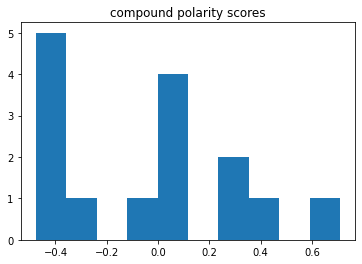

In [28]:
plt.hist([t['compound'] for t in nltk_sentiments_dict.values()])
plt.title("compound polarity scores")

Text(0.5, 1.0, 'positive polarity scores')

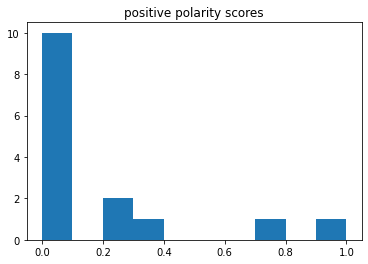

In [29]:
plt.hist([t['pos'] for t in nltk_sentiments_dict.values()])
plt.title("positive polarity scores")

Text(0.5, 1.0, 'negative polarity scores')

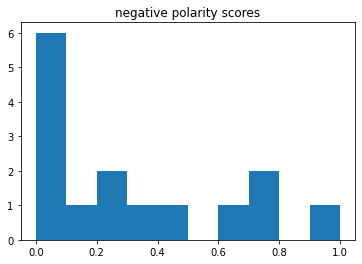

In [30]:
plt.hist([t['neg'] for t in nltk_sentiments_dict.values()])
plt.title("negative polarity scores")